# DBSCAN Code-Along

In [1]:
## import everything

import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#we'll work with the iris dataset again

# load the data
iris = datasets.load_iris()

# identify target and features
X, y = iris.data, iris.target

In [3]:
# Standardize X
X_scaled = StandardScaler().fit_transform(X)
# what does standard scalar do? 
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

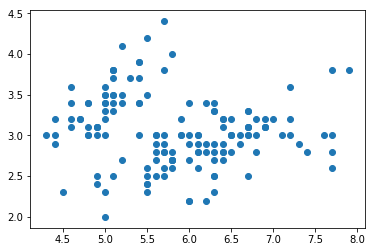

In [4]:
# Explore our data to look or potential clusters - see any?
plt.scatter(X[:,0], X[:,1])


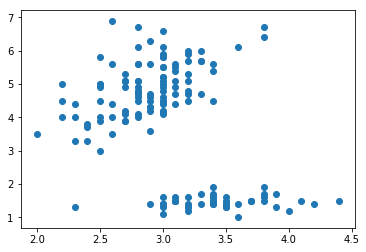

In [5]:
plt.scatter(X[:,1], X[:,2])


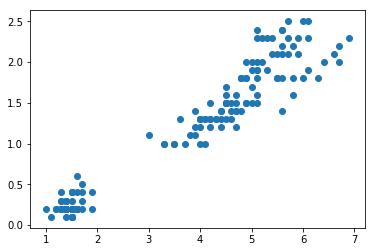

In [6]:
plt.scatter(X[:,2], X[:,3])

In [7]:
# setup DBSCAN
dbscn = DBSCAN(eps = .5, min_samples = 5).fit(X_scaled)  

In [8]:
labels = dbscn.labels_  
print(labels) # comprehension: what do these mean? How many are there?

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0 -1  0  0
  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  1  1  1  1  1  1 -1 -1  1 -1 -1  1 -1  1  1  1  1  1 -1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1  1  1 -1  1
 -1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1  1  1 -1  1  1
 -1  1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1]


In [9]:
# identify core samples
core_samples = np.zeros_like(labels, dtype = bool)  

core_samples[dbscn.core_sample_indices_] = True 
print(core_samples)

[ True  True  True  True  True  True  True  True False  True  True  True
  True False False False False  True False  True  True  True False  True
  True  True  True  True  True  True  True  True False False  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True False False  True False  True  True False False  True False
 False  True False  True  True  True  True  True False  True False  True
 False  True  True  True False  True  True  True  True  True  True  True
 False False  True False  True  True  True  True  True False  True  True
  True  True False  True False  True False  True  True False False False
 False False  True  True  True False False False  True False False False
  True False False  True False False  True False False False False False
 False  True False False False  True  True  True  True  True  True  True
 False  True False  True False False]


In [45]:
# declare the number of clusters:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

2

In [46]:
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_scaled, labels))


# homogeneity: each cluster contains only members of a single class.
# completeness: all members of a given class are assigned to the same cluster.
# The V-measure is the harmonic mean between homogeneity and completeness:
# Silhouette Coefficient - The best value is 1 and the worst value is -1. 
    # Values near 0 indicate overlapping clusters. 
    # Negative values generally indicate that a sample has been assigned to the wrong cluster, 
    # as a different cluster is more similar.


Estimated number of clusters: 2
Homogeneity: 0.489
Completeness: 0.510
V-measure: 0.500
Silhouette Coefficient: 0.349


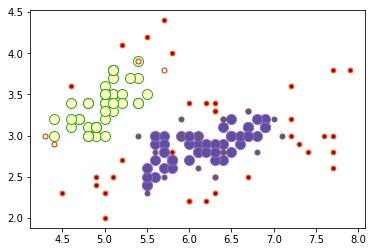

In [47]:
# plot our clusters
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))

for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    n = X[class_member_mask & core_samples]
    plt.plot(n[:,0],n[:,1], 'o', markerfacecolor = color, markersize = 10)
    
    n = X[class_member_mask & ~core_samples]
    plt.plot(n[:,0],n[:,1], 'o', markerfacecolor = color, markersize = 5)